In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use(['science','notebook'])
from scipy.interpolate import CubicSpline as cs

plt.rcParams["font.family"] = "serif"
zlim=[0.00587, 0.00907, 0.01351, 0.01613 ,0.01826, 0.02121, 0.02324, 0.02531, 0.02873,
 0.03139, 0.03486, 0.04146, 0.05057, 0.06976, 0.10762]
from matplotlib import ticker
import json


In [2]:
C1_CMB=pd.read_csv('C1_CMB_REVB_errors.csv',index_col=0)

C1_LG=pd.read_csv('C1_LG_REVB_errors.csv',index_col=0)
C1_HD=pd.read_csv('C1_HD_REVB_errors.csv',index_col=0)

C1_HEL=pd.read_csv('C1_HEL_REVB_errors.csv',index_col=0)
C2_CMB=pd.read_csv('CMB_REVB_TRUE_C2_errors.csv',index_col=0)
C2_HEL=pd.read_csv('HEL_REVB_TRUE_C2_errors.csv',index_col=0)

C2_HD=pd.read_csv('HD_REVB_TRUE_C2_errors.csv',index_col=0)
C2_LG=pd.read_csv('LG_REVB_TRUE_C2_errors.csv',index_col=0)


#C2_CMB['QD_errors'].apply(type)

C2_HD['QD_errors'] = C2_HD['QD_errors'].apply(json.loads)
C2_HD['QM_errors'] = C2_HD['QM_errors'].apply(json.loads)


C2_CMB['QD_errors'] = C2_CMB['QD_errors'].apply(json.loads)
C2_CMB['QM_errors'] = C2_CMB['QM_errors'].apply(json.loads)


C2_HEL['QD_errors'] = C2_HEL['QD_errors'].apply(json.loads)
C2_HEL['QM_errors'] = C2_HEL['QM_errors'].apply(json.loads)

C1_CMB['QD_errors'] = C1_CMB['QD_errors'].apply(json.loads)
C1_CMB['QM_errors'] = C1_CMB['QM_errors'].apply(json.loads)

C1_HEL['QD_errors'] = C1_HEL['QD_errors'].apply(json.loads)
C1_HEL['QM_errors'] = C1_HEL['QM_errors'].apply(json.loads)

C1_LG['QD_errors'] = C1_LG['QD_errors'].apply(json.loads)
C1_LG['QM_errors'] = C1_LG['QM_errors'].apply(json.loads)


C1_HD['QD_errors'] = C1_HD['QD_errors'].apply(json.loads)
C1_HD['QM_errors'] = C1_HD['QM_errors'].apply(json.loads)

C2_LG['QD_errors'] = C2_LG['QD_errors'].apply(json.loads)
C2_LG['QM_errors'] = C2_LG['QM_errors'].apply(json.loads)

In [5]:
def error_bars(df_col):
    errors=np.reshape(np.array(list(df_col)).T,(2,15))
    return errors

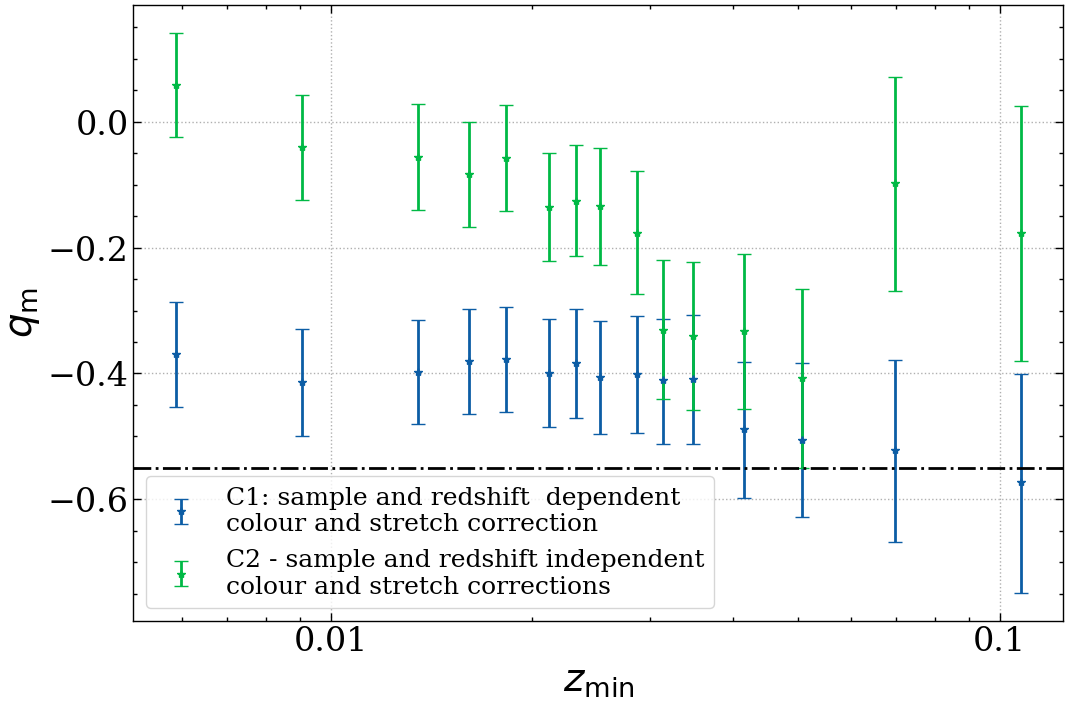

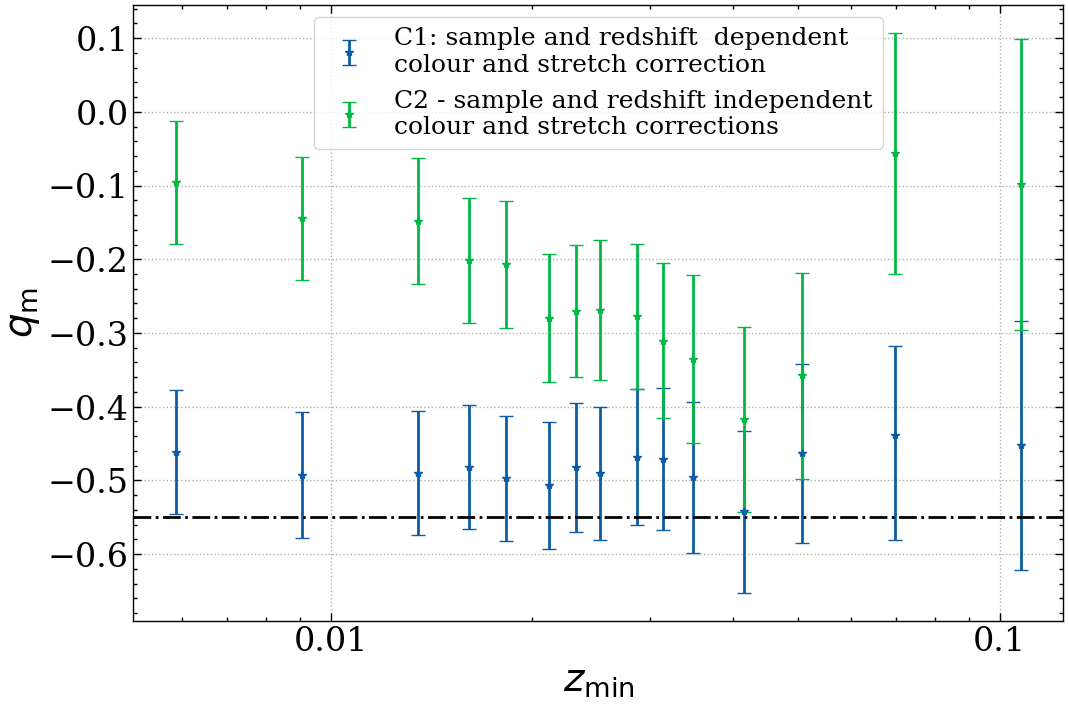

C:\Users\Animesh\AppData\Local\Temp\ipykernel_5692\2825357966.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "*" (-> marker='*'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qd']),marker='o',color=color[i],label=labels[i], yerr=error_bars(eval(f'C1_{frame}')['QD_errors']), fmt='*', capsize=5)


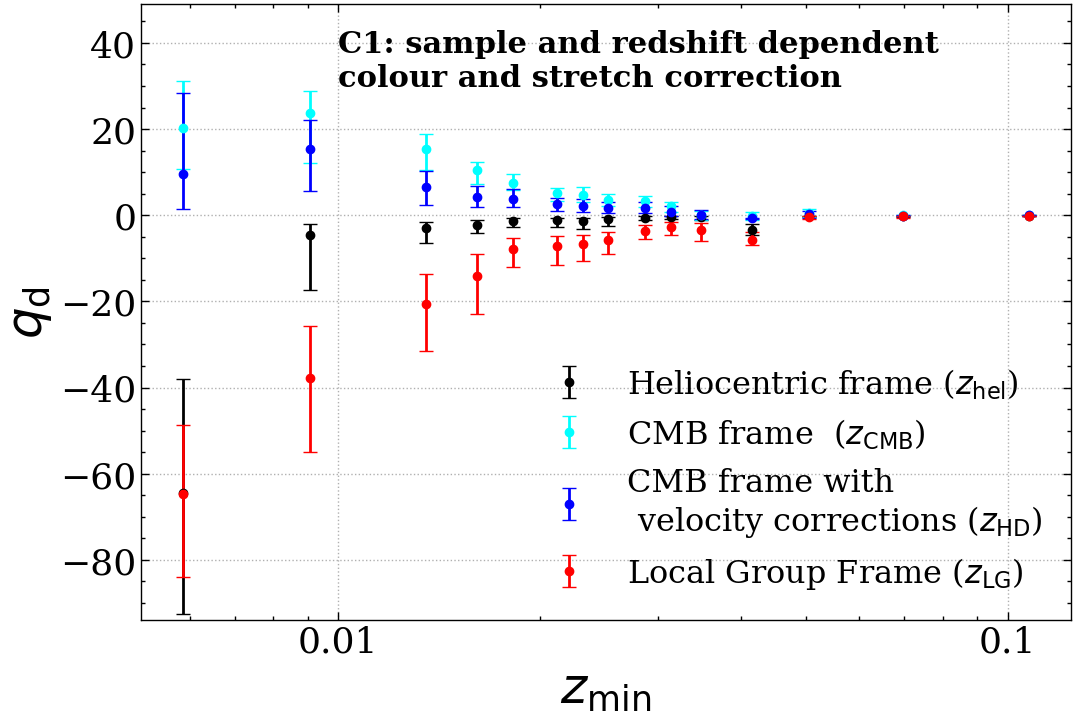

In [73]:
frames=['HEL','CMB','HD','LG']
color=['black','cyan','blue','red']

labels=['Heliocentric frame ($z_{\mathrm{hel}}$)', 'CMB frame  ($z_{\mathrm{CMB}}$)' , 'CMB frame with \n velocity corrections ($z_{\mathrm{HD}}$)','Local Group Frame ($z_{\mathrm{LG}}$)']
plt.figure(figsize=(12, 8))
i=0
for frame in frames:
    plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qd']),marker='o',color=color[i],label=labels[i], yerr=error_bars(eval(f'C1_{frame}')['QD_errors']), fmt='*', capsize=5)
    i+=1
plt.xscale('log')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=23)
plt.xlabel('$z_{\mathrm{min}}$',size=36)
plt.ylabel('$q_{\mathrm{d}}$',size=36)
plt.grid(ls=':')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: (float(x))))
plt.text(0.01,30,'C1: sample and redshift dependent \ncolour and stretch correction',weight='bold',fontsize=22)
plt.ylim(-94,49)
plt.savefig('cumulative_qd_C1.pdf')  

C:\Users\Animesh\AppData\Local\Temp\ipykernel_5692\1392242544.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "*" (-> marker='*'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qd']),color=color[i],label=labels[i],marker='o', yerr=error_bars(eval(f'C2_{frame}')['QD_errors']), fmt='*', capsize=5)


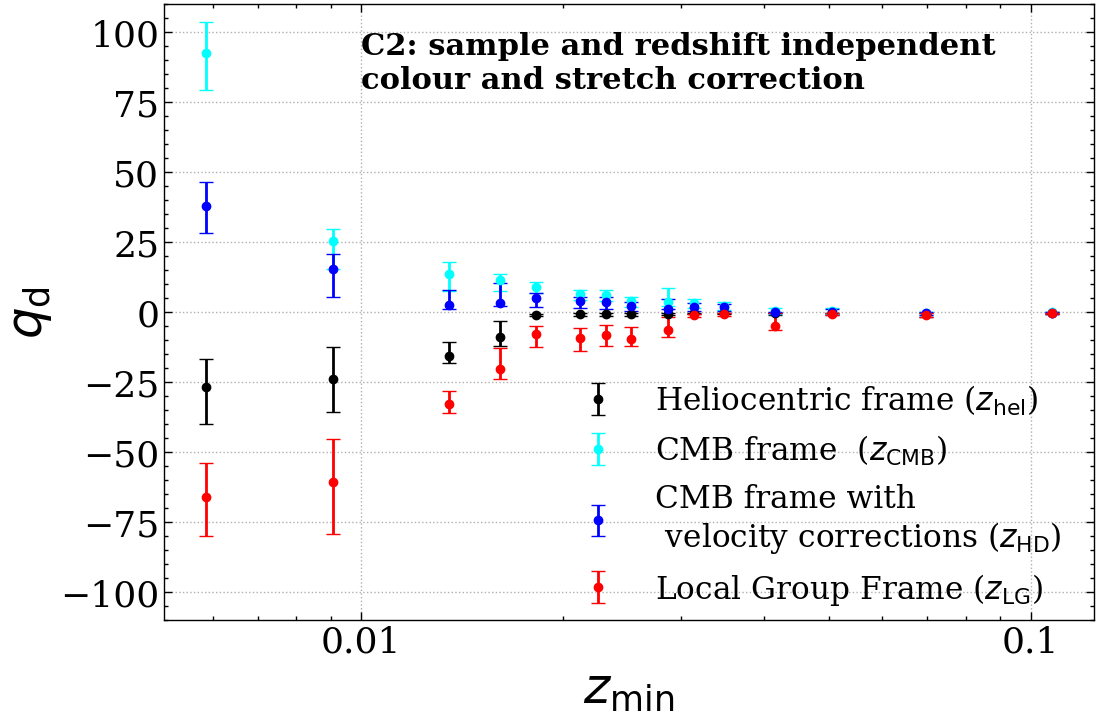

In [67]:
#### frames=['HEL','CMB','HD','LG']

i=0
color=['black','cyan','blue','red']

plt.figure(figsize=(12, 8))
for frame in frames:
    plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qd']),color=color[i],label=labels[i],marker='o', yerr=error_bars(eval(f'C2_{frame}')['QD_errors']), fmt='*', capsize=5)
    i+=1
plt.xscale('log')
plt.ylim(-110,110)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=22.5,loc=(0.42,0.001))
plt.xlabel('$z_{\mathrm{min}}$',size=36)
plt.ylabel('$q_{\mathrm{d}}$',size=36)
plt.grid(ls=':')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: (float(x))))
plt.text(0.01,80,'C2: sample and redshift independent \ncolour and stretch correction',weight='bold',fontsize=22)
#plt.text(0.01,30,'C1: sample and redshift dependent \ncolour and stretch correction',weight='bold',fontsize=22)
plt.savefig('cumulative_qd_C2.pdf')  

C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C1_{frame}')['QM_errors']), fmt='o', capsize=5,label='C1: sample and redshift dependent \ncolour and stretch correction')
C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C2_{frame}')['QM_errors']), fmt='o', capsize=5,label='C2: sample and redshift independent \ncolour and stretch correction')


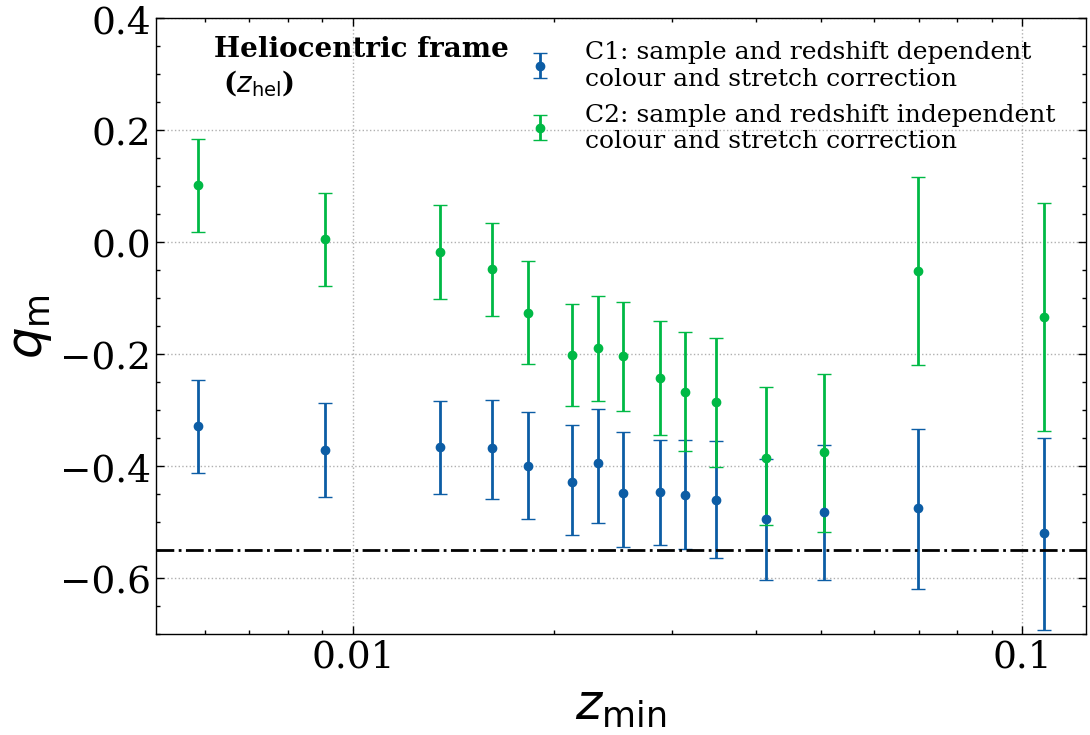

C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C1_{frame}')['QM_errors']), fmt='o', capsize=5,label='C1: sample and redshift dependent \ncolour and stretch correction')
C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C2_{frame}')['QM_errors']), fmt='o', capsize=5,label='C2: sample and redshift independent \ncolour and stretch correction')


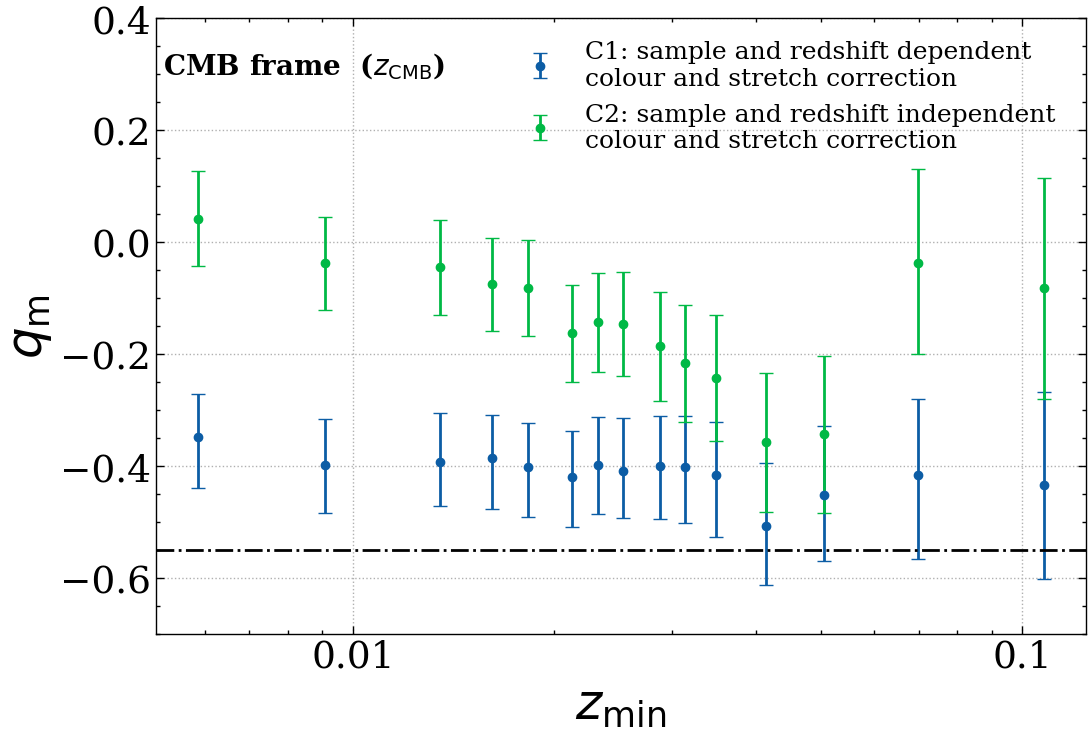

C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C1_{frame}')['QM_errors']), fmt='o', capsize=5,label='C1: sample and redshift dependent \ncolour and stretch correction')
C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C2_{frame}')['QM_errors']), fmt='o', capsize=5,label='C2: sample and redshift independent \ncolour and stretch correction')


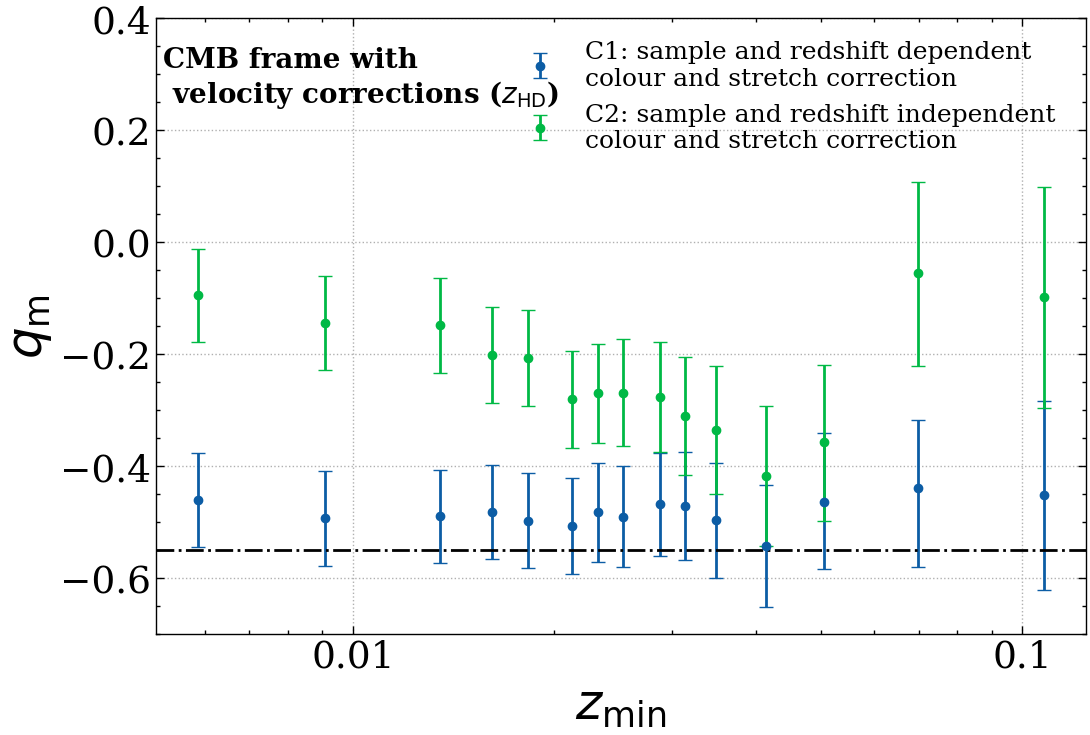

C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C1_{frame}')['QM_errors']), fmt='o', capsize=5,label='C1: sample and redshift dependent \ncolour and stretch correction')
C:\Users\Animesh\AppData\Local\Temp\ipykernel_17808\2743092472.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C2_{frame}')['QM_errors']), fmt='o', capsize=5,label='C2: sample and redshift independent \ncolour and stretch correction')


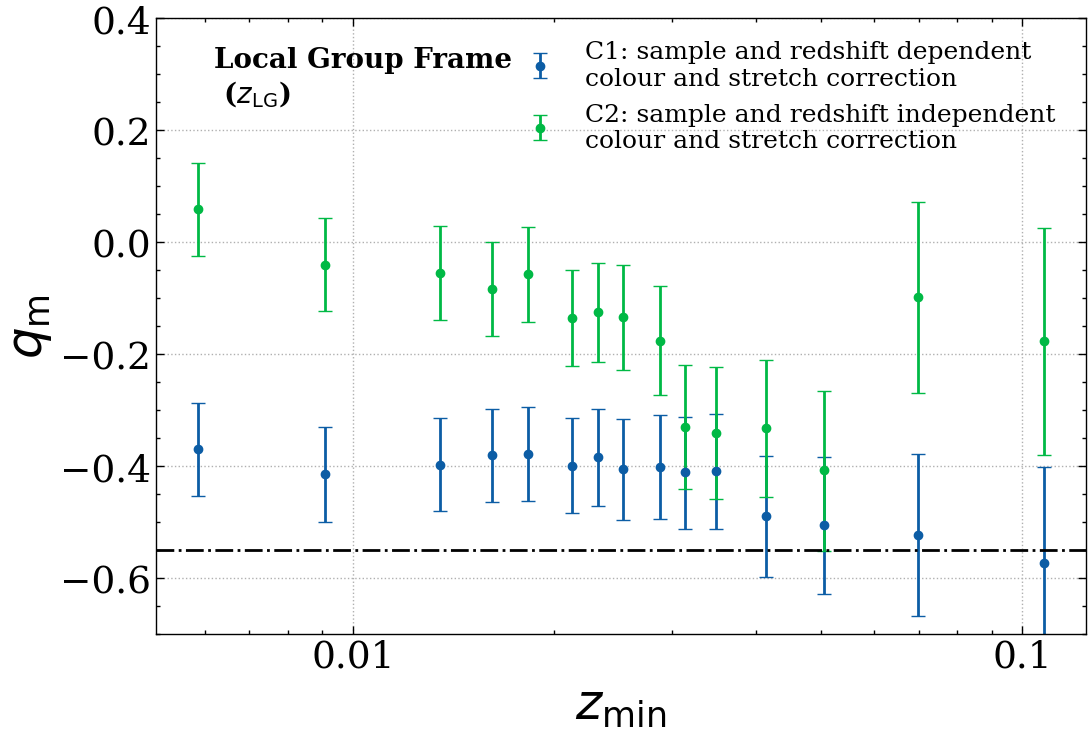

In [71]:
i=0
xloc=0.0052
# loc=[[xloc,0.15],[xloc,0.15],[xloc,0.1],[xloc,0.12]]
loc=[[xloc+0.001,0.27],[xloc,0.3],[xloc,0.25],[xloc+0.001,0.25]]

for frame in frames:
    plt.figure(figsize=(12, 8))
    plt.errorbar(np.array(eval(f'C1_{frame}')['zlim']), np.array(eval(f'C1_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C1_{frame}')['QM_errors']), fmt='o', capsize=5,label='C1: sample and redshift dependent \ncolour and stretch correction')
    plt.errorbar(np.array(eval(f'C2_{frame}')['zlim']), np.array(eval(f'C2_{frame}')['qm']),marker='o', yerr=error_bars(eval(f'C2_{frame}')['QM_errors']), fmt='o', capsize=5,label='C2: sample and redshift independent \ncolour and stretch correction')
    plt.xscale('log')
    plt.xticks(fontsize=27)
    plt.yticks(fontsize=27)
    plt.legend(fontsize=18,loc=1)
    plt.grid(ls=':')
    plt.xlabel('$z_{\mathrm{min}}$',size=36)
    plt.ylabel('$q_{\mathrm{m}}$',size=36)
    plt.ylim(-0.7,0.4)
    plt.axhline(-0.55,ls='-.',color='k')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: (float(x))))
    plt.text(*loc[i],labels[i],weight='bold',fontsize=20)
    plt.savefig(f'{frame}_qm.pdf')

    plt.show()
    i+=1
    
